Problem Statement - "Find the Best model to predict behavior to retain customers. You can analyze all relevant customer
data and develop focused customer retention programs."

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Read data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col='customerID')

Inspect the data

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Data Manipulation

In [7]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [8]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


In [9]:
len(df[df['TotalCharges'].isna()])

0

In [10]:
# We need to convert the Total Charges from object type to Numeric
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [11]:
#Every missing value record comes from customers who has not opted out
#imputation
df['TotalCharges'] = df['TotalCharges'].fillna((df['TotalCharges'].mean()))

Exploratory Data Analysis

In [12]:
df_categorical = df.select_dtypes(include=object)
column_categorical = df_categorical.columns

In [13]:
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [14]:
df_numerical = df.select_dtypes(include=np.float)
column_numerical = df_numerical.columns

In [15]:
df_numerical.head()

,MonthlyCharges,TotalCharges
customerID,,
7590-VHVEG,29.85,29.85
5575-GNVDE,56.95,1889.50
3668-QPYBK,53.85,108.15
7795-CFOCW,42.30,1840.75
9237-HQITU,70.70,151.65


Univariate Analysis

"""
This function plots the count or distribution of each co
lumn in the dataframe based on specified inputs
@Args
df: pandas dataframe
col_to_exclude: specific column to exclude from the pl
ot, used for excluded key
object_mode: whether to plot on object data types or n
ot (default: True)
Return
No object returned but visualized plot will return bas
ed on specified inputs
"""

In [16]:
def display_plot(df, col_to_exclude, object_mode = True):

    n = 0
    this = []
    if object_mode:
        nrows = 4
        ncols = 4
        width = 20
        height = 20
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10

    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
        else:
            if (df[column].dtypes != 'O'):
                this.append(column)
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
            for col in range(ncols):
                if object_mode:
                    g = sns.countplot(df[this[n]], ax=ax[row][col])
                else:
                    display_plot(df, 'customerid', object_mode = True)

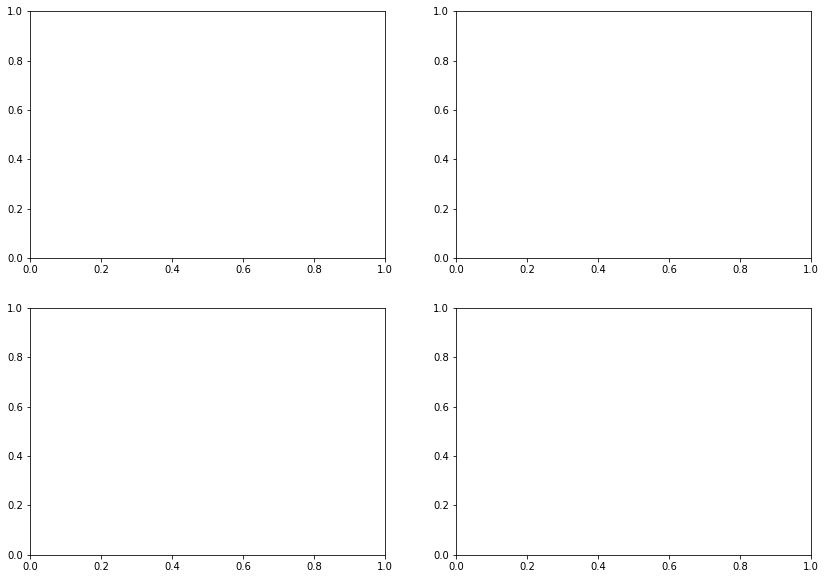

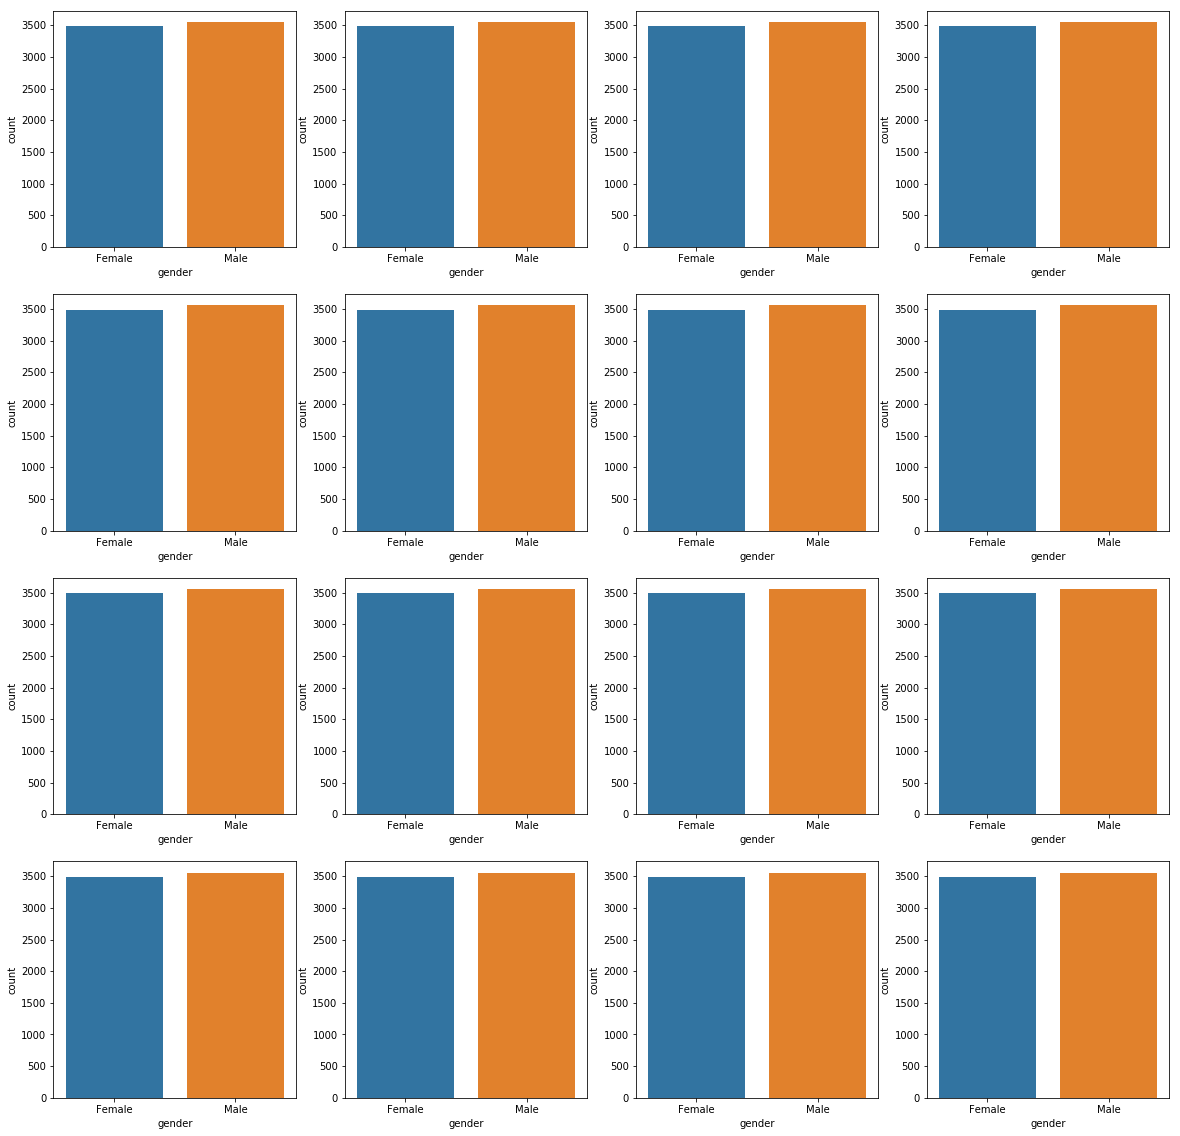

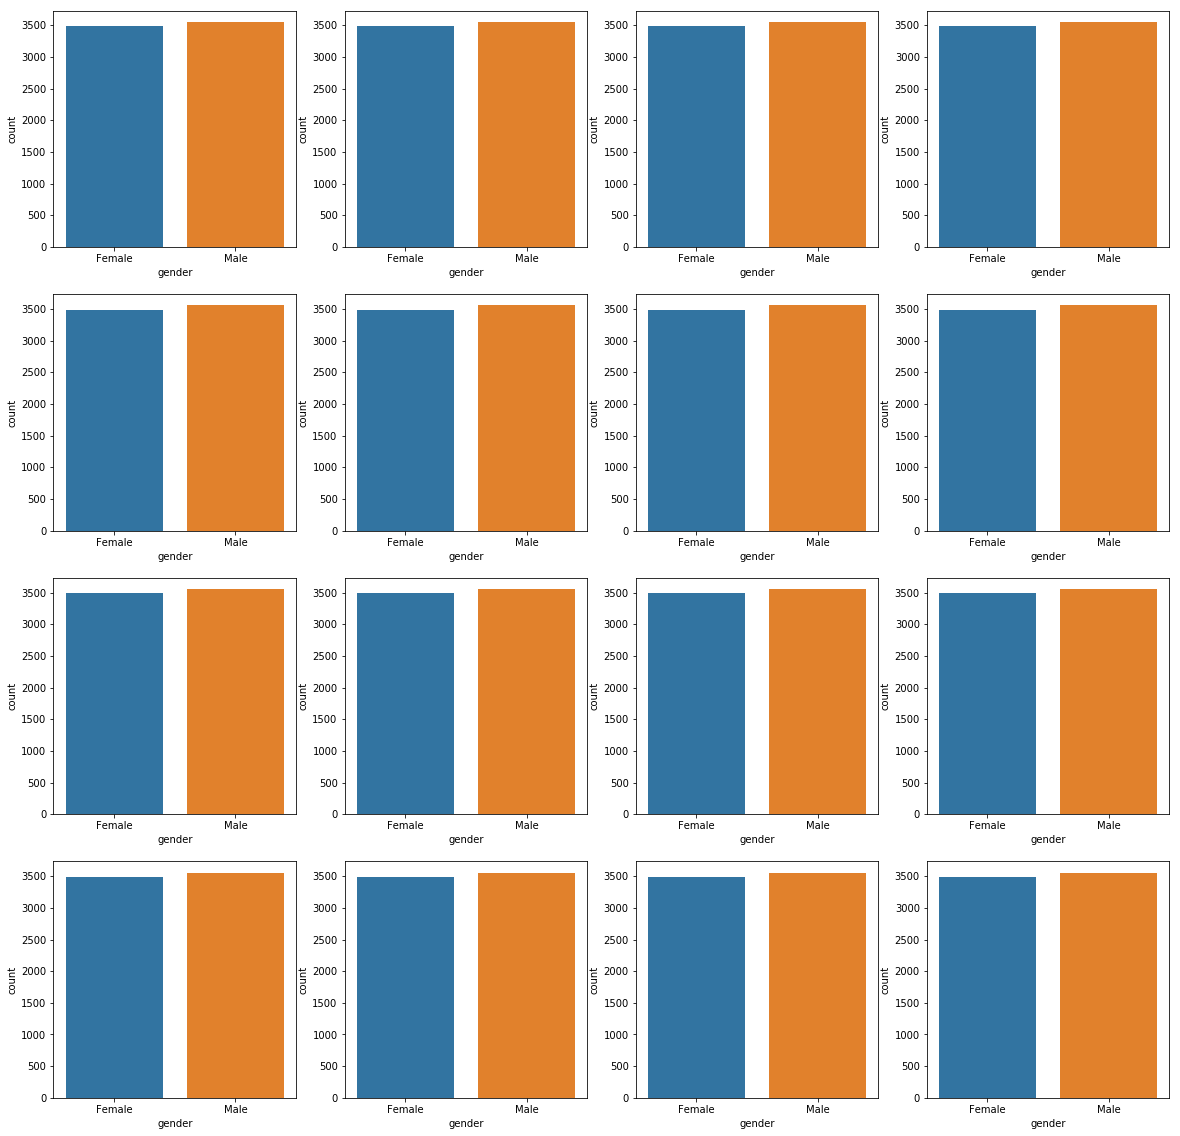

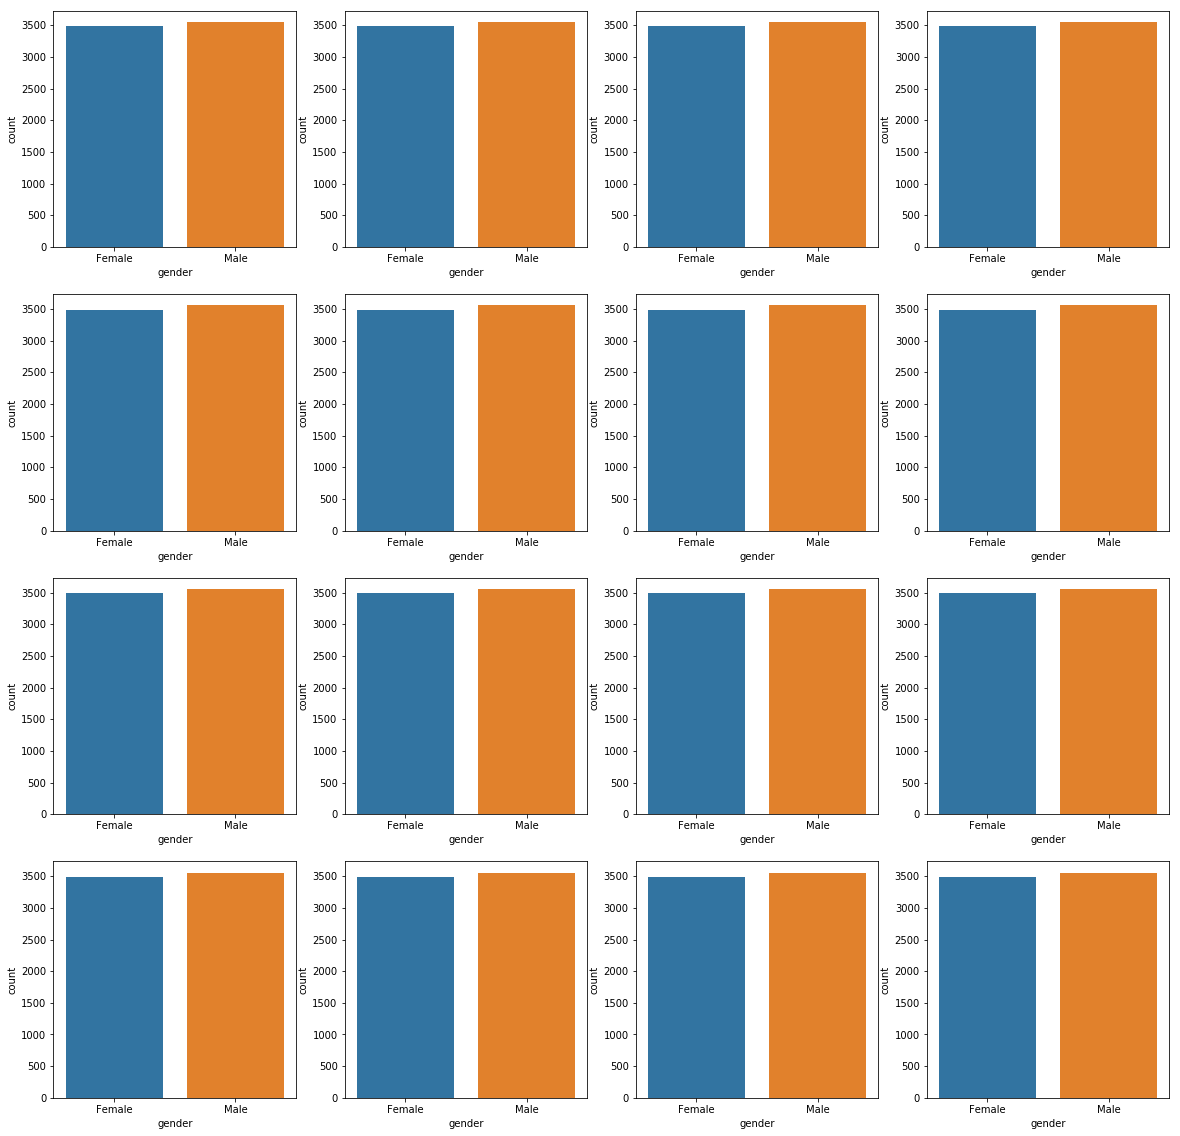

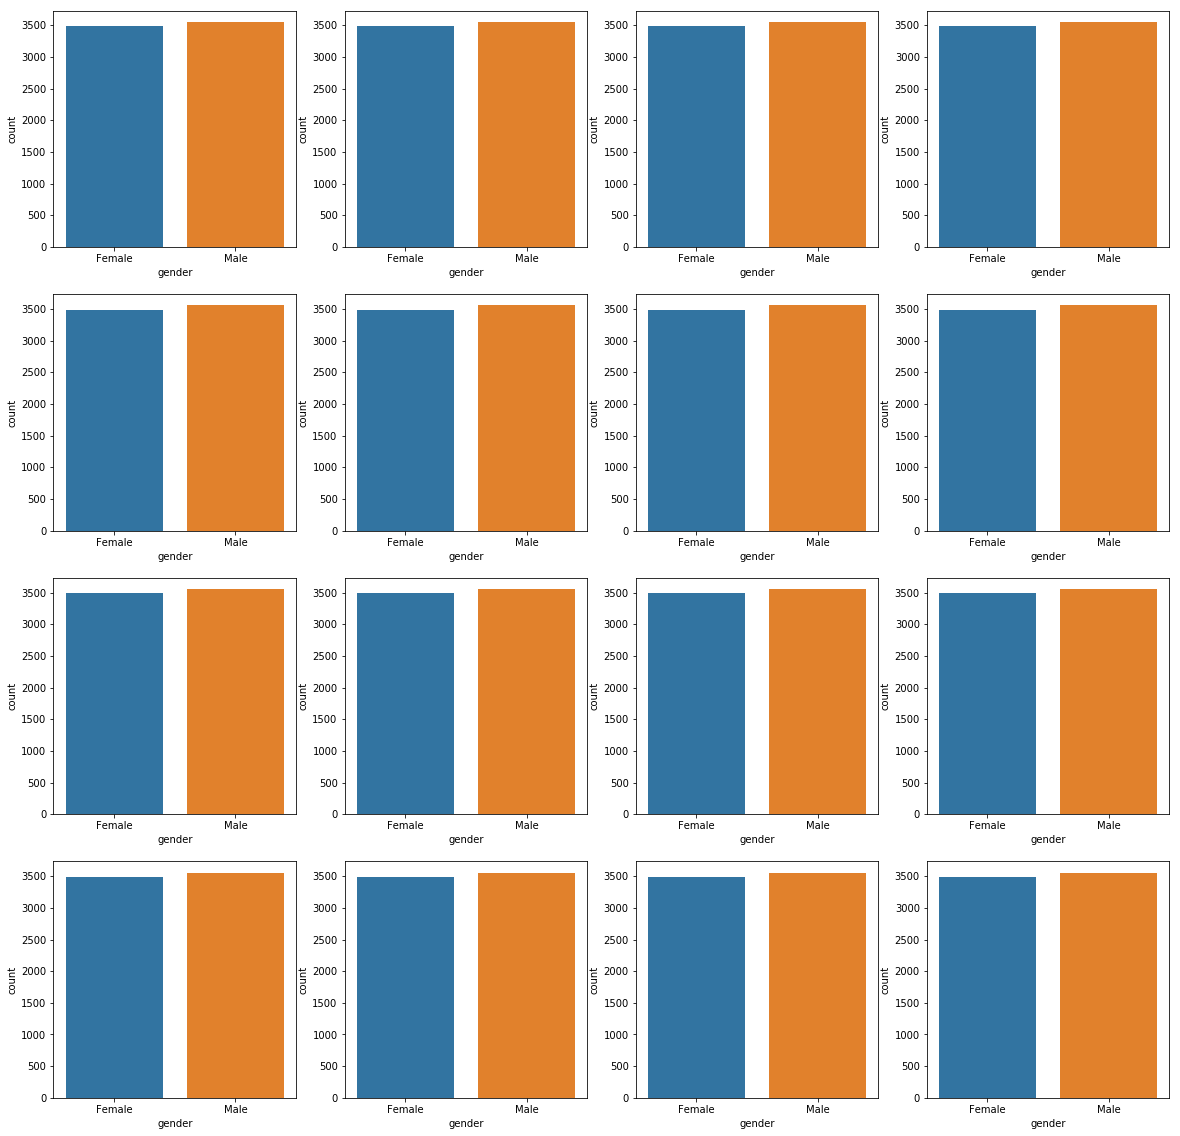

In [18]:
display_plot(df, 'customerid', object_mode = False)

Feature Engineering 

In [19]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,682,0
Yes,3390,0,2971


In [20]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0


In [27]:
def convert_no_service (df):
    col_to_transform = []
    for col in df.columns:
        if (df[col].dtype == 'O') & (col != 'customerid'):
            if len(df[df[col].str.contains("No")][col].unique()) > 1:
                col_to_transform.append(col)
    print("Total column(s) to transform: {}".format(col_to_transform))
    for col in col_to_transform:
            df.loc[df[col].str.contains("No"), col] = 'No'
    return df

Total column(s) to transform: ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


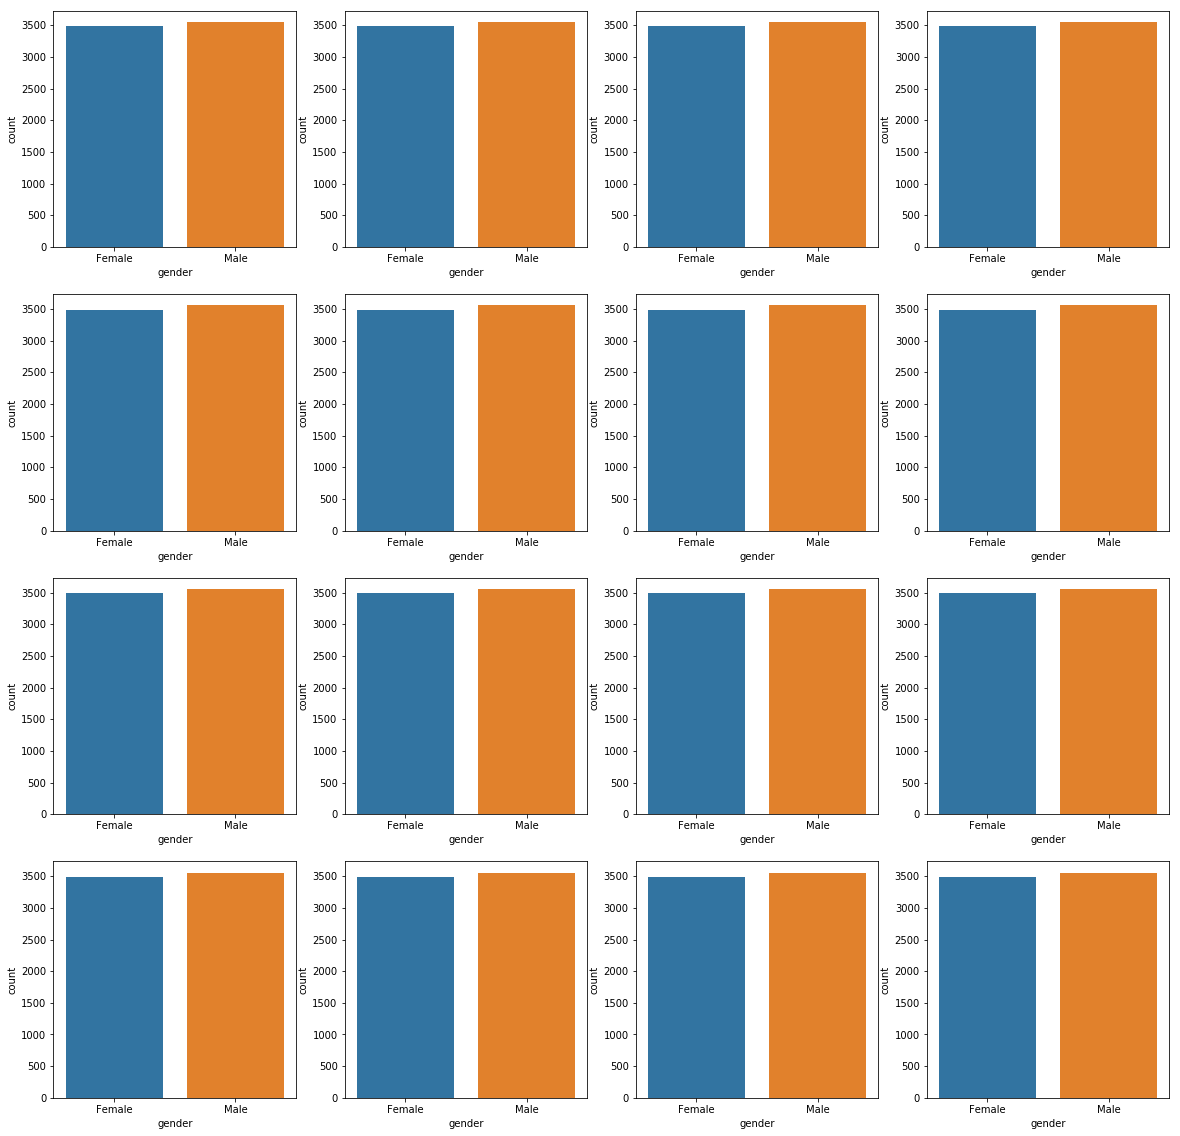

In [28]:
df = convert_no_service(df)
# Let's see the data after transformation.
display_plot(df, 'customerid', object_mode = True)

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043
Percent of Females that Left the Company 50.24077046548957
Percent of Males that Left the Company 49.75922953451043


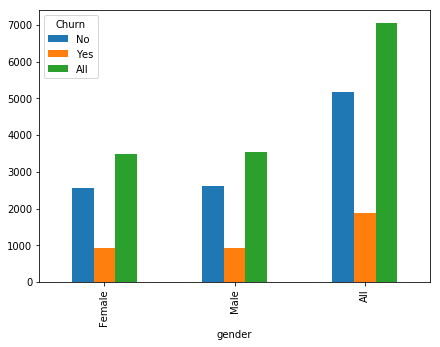

In [30]:
# Now Let's Start Comparing.
# Gender Vs Churn
print(pd.crosstab(df.gender,df.Churn,margins=True))
pd.crosstab(df.gender,df.Churn,margins=True).plot(kind='bar',
figsize=(7,5));
print('Percent of Females that Left the Company {0}'.format((939/1869)*100))
print('Percent of Males that Left the Company {0}'.format((930/1869)*100))

Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043
Percent of Month-to-Month Contract People that Left the Company 88.55002675227395
Percent of One-Year Contract People that Left the Company 8.881754949170679
Percent of Two-Year Contract People that Left the Company 2.568218298555377


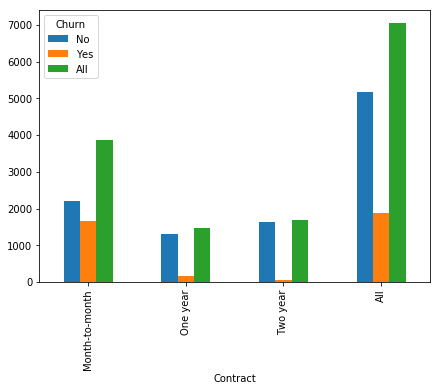

In [32]:
# Contract Vs Churn
print(pd.crosstab(df.Contract,df.Churn,margins=True))
pd.crosstab(df.Contract,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));
print('Percent of Month-to-Month Contract People that Left the Company {0}'.format((1655/1869)*100))
print('Percent of One-Year Contract People that Left the Company {0}'.format((166/1869)*100))
print('Percent of Two-Year Contract People that Left the Company {0}'.format((48/1869)*100))

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043
Percent of DSL Internet-Service People that Left the Company 24.558587479935795
Percent of Fiber Optic Internet-Service People that Left the Company 69.39539860888175
Percent of No Internet-Service People that Left the Company 6.046013911182451


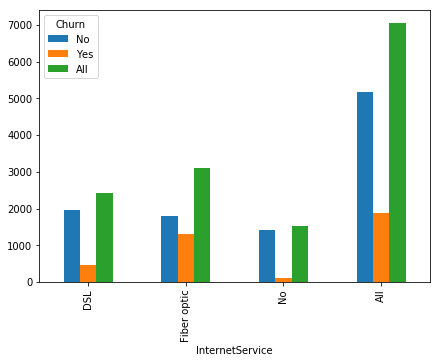

In [33]:
# Internet Service Vs Churn
print(pd.crosstab(df.InternetService,df.Churn,margins=True))
pd.crosstab(df.InternetService,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));
print('Percent of DSL Internet-Service People that Left the Company {0}'.format((459/1869)*100))
print('Percent of Fiber Optic Internet-Service People that Left the Company {0}'.format((1297/1869)*100))
print('Percent of No Internet-Service People that Left the Company {0}'.format((113/1869)*100))

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043
Percent of Partner that had Dependents 82.8909952606635
Percent of Non-Partner that had Dependents 17.10900473933649


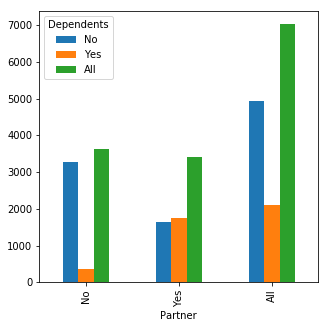

In [34]:
# Partner Vs Dependents
print(pd.crosstab(df.Partner,df.Dependents,margins=True))
pd.crosstab(df.Partner,df.Dependents,margins=True).plot(kind='bar',figsize=(5,5));
print('Percent of Partner that had Dependents {0}'.format((1749/2110)*100))
print('Percent of Non-Partner that had Dependents {0}'.format((361/2110)*100))

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


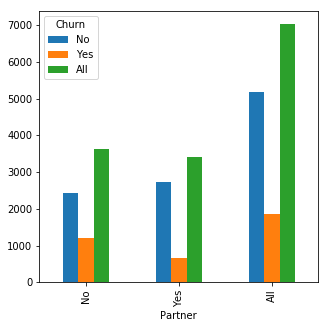

In [35]:
# Partner Vs Churn
print(pd.crosstab(df.Partner,df.Churn,margins=True))
pd.crosstab(df.Partner,df.Churn,margins=True).plot(kind='bar',figsize=(5,5));

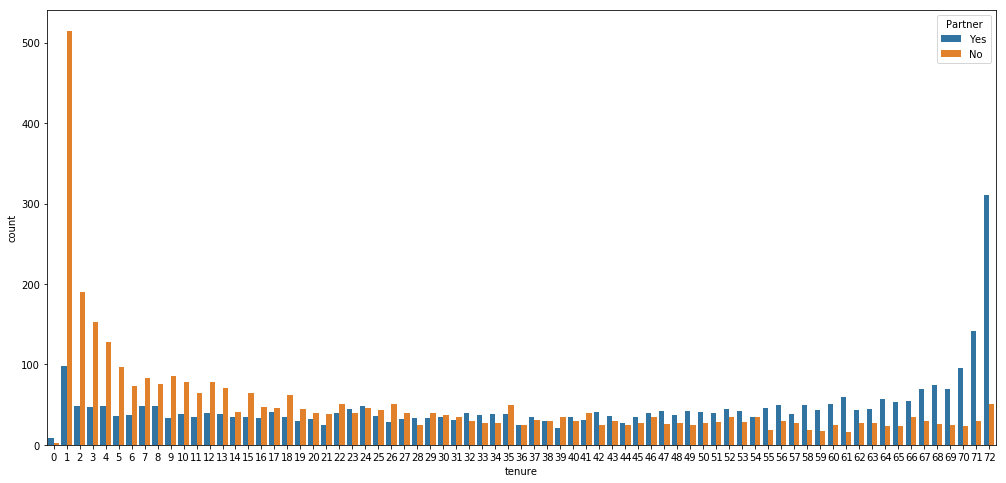

In [36]:
plt.figure(figsize=(17,8))
sns.countplot(x=df['tenure'],hue=df.Partner);

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


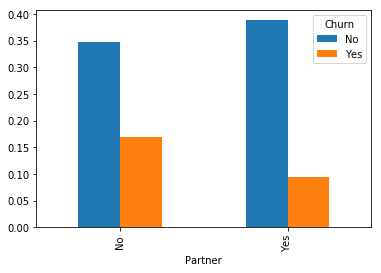

In [37]:
# Partner Vs Churn
print(pd.crosstab(df.Partner,df.Churn,margins=True))
pd.crosstab(df.Partner,df.Churn,normalize=True).plot(kind='bar');

Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


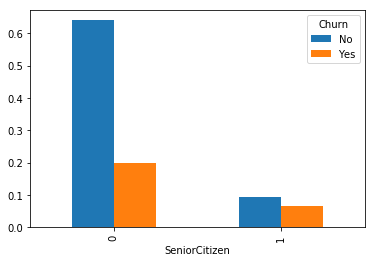

In [38]:
# Senior Citizen Vs Churn
print(pd.crosstab(df.SeniorCitizen,df.Churn,margins=True))
pd.crosstab(df.SeniorCitizen,df.Churn,normalize=True).plot(kind='bar');

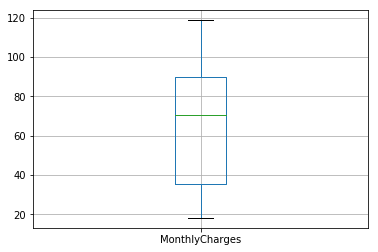

In [39]:
df.boxplot('MonthlyCharges');

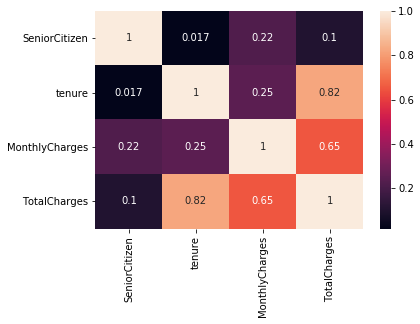

In [40]:
## correlation matrix
# Let's Check the Correaltion Matrix in Seaborn
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values,annot=True);

In [42]:
#Bucketing
#Tenure to categorical column
def tenure_lab(telcom) :
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
df["tenure_group"] = df.apply(lambda x:tenure_lab(x),axis = 1)

Data Preprocessing

In [43]:
#Encoding categorical variables 
#replace values
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col = ['customerID']
#Target columns
target_col = ["Churn"]

#categorical columns
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

In [47]:
#normalizing features
telcom = df
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)
#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

C:\Users\chandra.x.shekhar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\chandra.x.shekhar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
#Splitting train/val/test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data
telcom = df
# target_col = telcom["Churn"]
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
##seperating dependent and independent variables
cols = [i for i in telcom.columns if i not in target_col]
X_train = train[cols]
y_train = train["Churn"]
X_test = test[cols]
y_test = test["Churn"]

Model Building

In [53]:
from sklearn.dummy import DummyClassifier
# Feature Selection and Encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
# Machine learning
from sklearn import tree , linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost.sklearn import XGBClassifier

In [55]:
# validation
from sklearn import datasets, model_selection, metrics , preprocessing

In [56]:
# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# Metrics
from sklearn.metrics import precision_recall_fscore_support,roc_curve, auc

In [58]:
#utilities
import time
import io, os, sys, types, time, datetime, math, random

In [60]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [63]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression,
                          KNeighborsClassifier,
                          GaussianNB,
                          DecisionTreeClassifier,
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2)
# CV
    train_pred = model_selection.cross_val_predict(algo,
                                                  X_train,
                                                  y_train,
                                                  cv=cv,
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs


In [67]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))

In [68]:
#Baseline model with dummy classifier 
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [69]:
accuracy = clf.score(X_test, y_test)
accuracy

0.7535491198182851

In [70]:
preds = clf.predict(X_test)

# dummyistic Regression
start_time = time.time()
train_pred_dummy, test_pred_dummy, acc_dummy, acc_cv_dummy, probs_dummy = fit_ml_algo(DummyClassifier(strategy='most_frequent',random_state=0),
X_train,
y_train,
X_test,
10)
dummy_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dummy)
print("Accuracy CV 10-Fold: %s" % acc_cv_dummy)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))
print (metrics.classification_report(y_train, train_pred_dummy))
print (metrics.classification_report(y_test, test_pred_dummy))

Accuracy: 75.35
Accuracy CV 10-Fold: 72.83
Running Time: 0:00:04.795654
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      3847
           1       0.00      0.00      0.00      1435

   micro avg       0.73      0.73      0.73      5282
   macro avg       0.36      0.50      0.42      5282
weighted avg       0.53      0.73      0.61      5282

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1327
           1       0.00      0.00      0.00       434

   micro avg       0.75      0.75      0.75      1761
   macro avg       0.38      0.50      0.43      1761
weighted avg       0.57      0.75      0.65      1761



C:\Users\chandra.x.shekhar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chandra.x.shekhar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chandra.x.shekhar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chandra.x.shekhar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Select Candidate Algorithms
1. KNN
2. Logistic Regression
3. Random Forest
4. Naive Bayes
5. Stochastic Gradient Decent
6. Linear SVC
7. Decision Tree
8. Gradient Boosted Trees

In [73]:
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'],'class_weight': [None, 'balanced'],'C': np.logspace(-20, 20, 10000),'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc,
n_jobs=-1,
param_distributions=param_dist,
n_iter=n_iter_search)
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"" parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

C:\Users\chandra.x.shekhar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV took 13.25 seconds for 10 candidates parameter settings.
Model with rank: 1
Model with rank: 1
Model with rank: 3
Model with rank: 4
Model with rank: 4


C:\Users\chandra.x.shekhar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\chandra.x.shekhar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chandra.x.shekhar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Accuracy: 80.86
Accuracy CV 10-Fold: 80.1
Running Time: 0:00:00.626418
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3847
           1       0.67      0.53      0.59      1435

   micro avg       0.80      0.80      0.80      5282
   macro avg       0.75      0.72      0.73      5282
weighted avg       0.79      0.80      0.79      5282

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1327
           1       0.62      0.56      0.59       434

   micro avg       0.81      0.81      0.81      1761
   macro avg       0.74      0.73      0.73      1761
weighted avg       0.80      0.81      0.81      1761



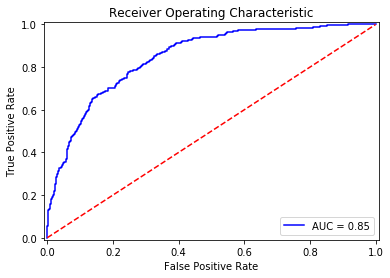

In [74]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log= fit_ml_algo(LogisticRegression(n_jobs = -1),
X_train,
y_train,
X_test,
10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))
print (metrics.classification_report(y_train, train_pred_log))
print (metrics.classification_report(y_test, test_pred_log))
plot_roc_curve(y_test, probs_log)

Accuracy: 74.56
Accuracy CV 10-Fold: 74.93
Running Time: 0:00:00.967445
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      3847
           1       0.55      0.46      0.50      1435

   micro avg       0.75      0.75      0.75      5282
   macro avg       0.68      0.66      0.67      5282
weighted avg       0.74      0.75      0.74      5282

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1327
           1       0.48      0.46      0.47       434

   micro avg       0.75      0.75      0.75      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.74      0.75      0.74      1761



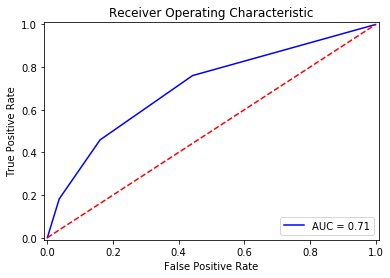

In [75]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn= fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
n_jobs = -1),
X_train,
y_train,
X_test,
10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))
print (metrics.classification_report(y_train, train_pred_knn))
print (metrics.classification_report(y_test, test_pred_knn))
plot_roc_curve(y_test, probs_knn)

Accuracy: 73.65
Accuracy CV 10-Fold: 74.67
Running Time: 0:00:00.145609
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      3847
           1       0.52      0.78      0.63      1435

   micro avg       0.75      0.75      0.75      5282
   macro avg       0.71      0.76      0.72      5282
weighted avg       0.80      0.75      0.76      5282

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1327
           1       0.48      0.81      0.60       434

   micro avg       0.74      0.74      0.74      1761
   macro avg       0.70      0.76      0.70      1761
weighted avg       0.81      0.74      0.75      1761



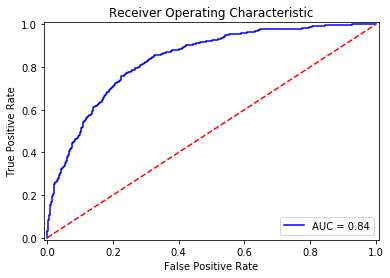

In [76]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(),
X_train,
y_train,
X_test,
10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))
print (metrics.classification_report(y_train, train_pred_gaussian))
print (metrics.classification_report(y_test, test_pred_gaussian))
plot_roc_curve(y_test, probs_gau)

Accuracy: 74.79
Accuracy CV 10-Fold: 71.32
Running Time: 0:00:00.346076
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      3847
           1       0.47      0.49      0.48      1435

   micro avg       0.71      0.71      0.71      5282
   macro avg       0.64      0.64      0.64      5282
weighted avg       0.72      0.71      0.71      5282

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1327
           1       0.49      0.55      0.52       434

   micro avg       0.75      0.75      0.75      1761
   macro avg       0.67      0.68      0.67      1761
weighted avg       0.76      0.75      0.75      1761



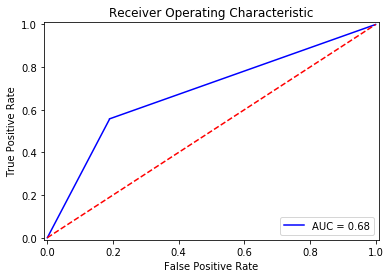

In [77]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(),
X_train,
y_train,
X_test,
10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))
print (metrics.classification_report(y_train, train_pred_dt))
print (metrics.classification_report(y_test, test_pred_dt))
plot_roc_curve(y_test, probs_dt)

In [79]:
# Random Forest Classifier - Random Search for Hyperparameters
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(results['mean_test_score'][candidate],results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc,n_jobs = -1,param_distributions=param_dist,n_iter=n_iter_search)
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"" parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

C:\Users\chandra.x.shekhar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV took 6.45 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.796 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.794 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 7, 'min_samples_split': 14}

Model with rank: 3
Mean validation score: 0.793 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 19}

Model with rank: 4
Mean validation score: 0.792 (std: 0.004)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 8}

Model with rank: 5
Mean validation score: 0.791 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini',

Accuracy: 80.01
Accuracy CV 10-Fold: 78.72
Running Time: 0:00:00.404922
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3847
           1       0.64      0.50      0.56      1435

   micro avg       0.79      0.79      0.79      5282
   macro avg       0.73      0.70      0.71      5282
weighted avg       0.78      0.79      0.78      5282

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1327
           1       0.60      0.56      0.58       434

   micro avg       0.80      0.80      0.80      1761
   macro avg       0.73      0.72      0.72      1761
weighted avg       0.80      0.80      0.80      1761



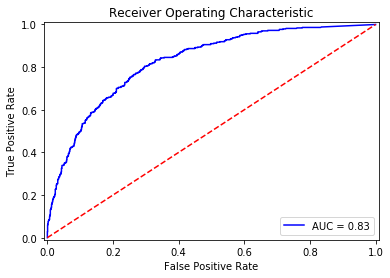

In [80]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10,min_samples_leaf=2,min_samples_split=17,criterion='gini',max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc,
X_train,
y_train,
X_test,
10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))
print (metrics.classification_report(y_train, train_pred_rf))
print (metrics.classification_report(y_test, test_pred_rf))
plot_roc_curve(y_test, probs_rf)

Accuracy: 80.58
Accuracy CV 10-Fold: 80.18
Running Time: 0:00:04.037249
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3847
           1       0.67      0.53      0.59      1435

   micro avg       0.80      0.80      0.80      5282
   macro avg       0.75      0.72      0.73      5282
weighted avg       0.79      0.80      0.79      5282

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1327
           1       0.62      0.55      0.58       434

   micro avg       0.81      0.81      0.81      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



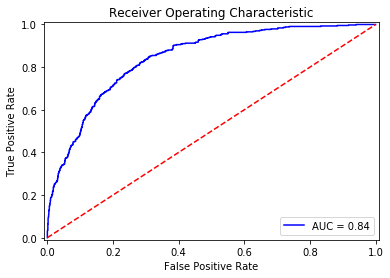

In [81]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt= fit_ml_algo(GradientBoostingClassifier(),
X_train,
y_train,
X_test,
10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))
print (metrics.classification_report(y_train, train_pred_gbt))
print (metrics.classification_report(y_test, test_pred_gbt))
plot_roc_curve(y_test, probs_gbt)

In [ ]:
def xgb_f1(y, t):
# Function to evaluate the prediction based on F1 score,this will be used as evaluation metric when training xgboost model
# Args:
# y: label
# t: predicted
#
# Return:
# f1: F1 score of the actual and predicted
    t= t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y] 
#change the prob to class output
    return 'f1', f1_score(t, y_bin)
best_xgb = XGBClassifier(objective = 'binary:logistic',
colsample_bylevel = 0.7,
colsample_bytree = 0.8,
gamma = 1,
learning_rate = 0.15,
max_delta_step = 3,
max_depth = 4,
min_child_weight = 1,
n_estimators = 50,
reg_lambda = 10,
scale_pos_weight = 1.5,
subsample = 0.9,
silent = False,
n_jobs = 4
)
xgbst = best_xgb.fit(X_train, y_train, eval_metric = xgb_f1,eval_set = [(X_train, y_train), (X_test, y_test)],early_stopping_rounds = 20)

In [ ]:
train_pred_xgbst, test_pred_xgbst, acc_xgbst, acc_cv_xgbst, p
robs_xgbst = fit_ml_algo(xgbst,
X_train,
y_train,
X_test,
10)

In [ ]:
import xgboost as xgb
xgb.plot_importance(best_xgb, max_num_features = 15)
plt.show();

In [87]:
#Compare all models
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Decision Tree',
'Gradient Boosting Trees'],
'Score': [
acc_knn,
acc_log,
acc_rf,
acc_gaussian,
acc_dt,
acc_gbt,
]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,80.86
5,Gradient Boosting Trees,80.58
2,Random Forest,80.01
4,Decision Tree,74.79
0,KNN,74.56
3,Naive Bayes,73.65


In [88]:
models = [
'KNN',
'Logistic Regression',
'Random Forest',
'Naive Bayes',
'Decision Tree',
'Gradient Boosting Trees',
]
probs = [
probs_knn,
probs_log,
probs_rf,
probs_gau,
probs_dt,
probs_gbt
]
colors = [
'blue',
'green',
'red',
'cyan',
'magenta',
'yellow',
'black',
]

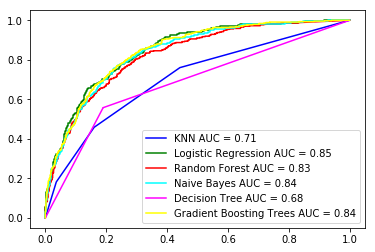

In [89]:
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' %
roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

#Interpretation & selection of the best model based on above graphs
Logistic Regression has the highest accuracy of 80.86

END OF ASSIGNMENT 